In [1]:
# Install stuff I might need
# pandas, numpy, matplotlib, scikit-learn
# pip install pandas numpy matplotlib seaborn scikit-learn


In [1]:
# import the libraries
import numpy as np
import pandas as pd

In [2]:

# get the data
from sklearn.datasets import load_wine
# get tools to split data
from sklearn.model_selection import train_test_split
# get the model we want to work with
from sklearn.tree import DecisionTreeClassifier
# get tools to check model performance
from sklearn.metrics import accuracy_score
# more on this later
from sklearn import tree
# stuff to plot this
import matplotlib.pyplot as plt

In [3]:
# load and explore the dataset
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

In [4]:
wine_df.tail(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [5]:
# Defining the features (X) and target (y)
X = wine.data
y = wine.target

In [6]:
# split our data into training and test for both features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Init the classifier
clf = DecisionTreeClassifier()

In [8]:
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# make predictions with the classifier??
y_pred = clf.predict(X_test)

In [10]:
# How accurate are those predictions?
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


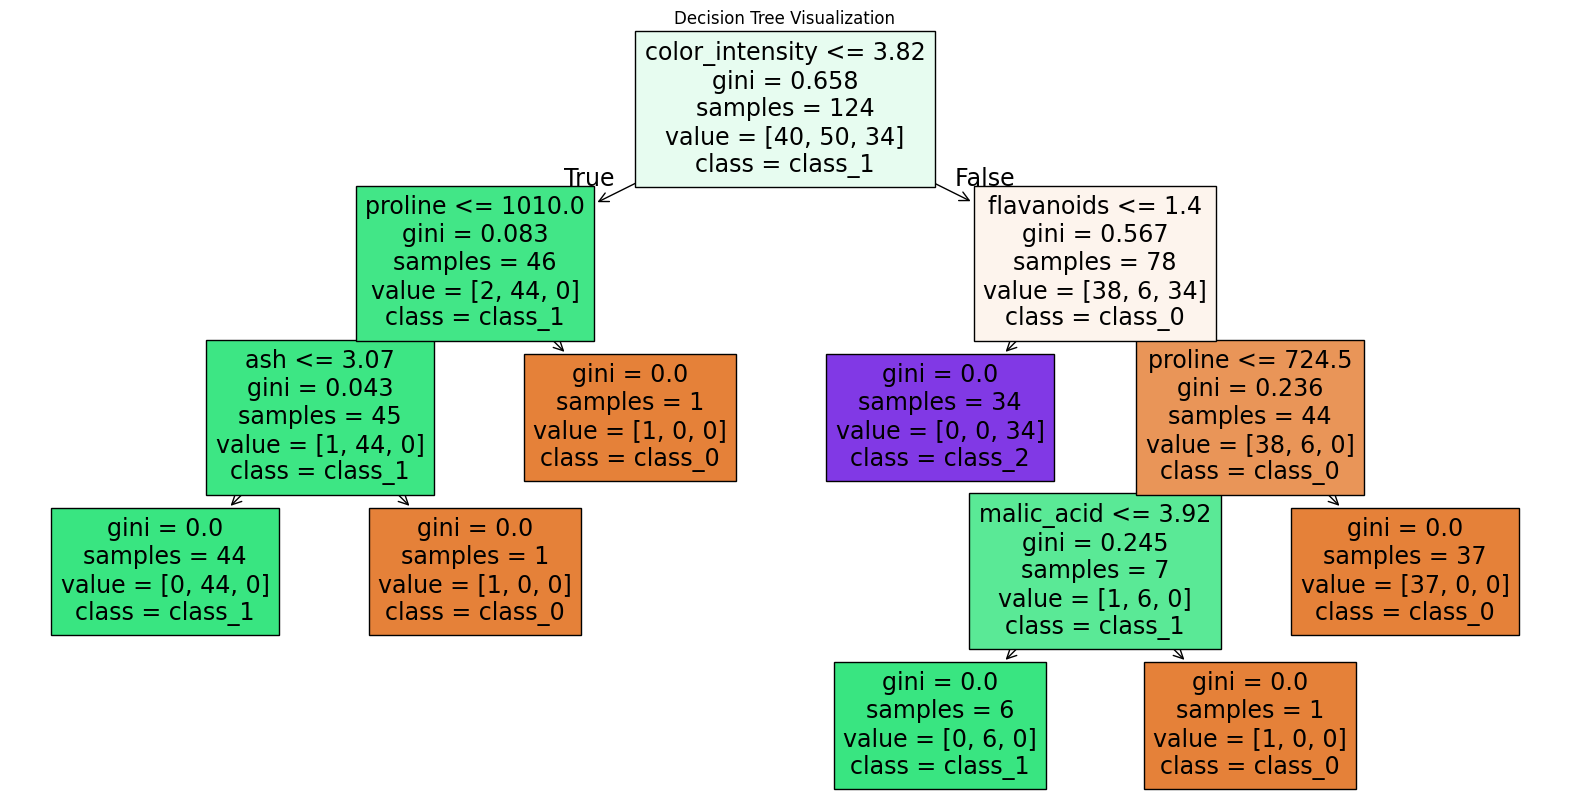

In [11]:
# plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [12]:
# Get the pickle module
import pickle

# using a context manager create and open a file
# f = open('decision_tree_model.pkl', 'wb')
# pickle.dump(clf, f)
# f.close()
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

print(f"Model saved to pickle")

Model saved to pickle


In [13]:
# Not needed here but here's how to load the pickle
with open('decision_tree_model.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)

sample_prediction = loaded_clf.predict(X_test[:1])
print(f"Sample prediction: {sample_prediction}")

Sample prediction: [0]
